<div class="alert alert-success">
     <b>  </b>
   
## LAB SUBMISSION Unsupervised learning: Clustering. Detect suspicious consumptions from households.  
    
    
    
Important Information:

* This lab report must be completed **individually**.
* Please upload your completed report to Atenea.
* You have until 9th january to submit the report.
</div>


**Objective**: The goal of this exercise is to identify households with atypical or suspicious consumption patterns compared to other users. These unusual patterns may not always indicate fraud but could be linked to system malfunctions (e.g., water leaks in toilets causing abnormally high water usage) or discrepancies such as a higher actual number of residents than recorded.

By detecting these anomalies, we aim to uncover potential issues and inefficiencies, allowing for timely interventions. The objective is to develop a clustering model to identify households exhibiting these atypical consumption behaviors. Analyze the results to determine which features contribute most to the detection of anomalies.



**Dataset Description**

The dataset is located in: **``Data/ Labsubmission_suspicious_consumption_dataset.xlsx``**

This shyntetic dataset for identifying suspicious consumption patterns in households includes the following features:

* ``Household_ID``: Unique identifier for each household.
* ``Daily_Electricity_kWh``: Daily electricity consumption in kWh.
* ``Daily_Water_Liters``: Daily water consumption in liters.
* ``Daily_Gas_CubicMeters``: Daily gas consumption in cubic meters.
* ``Num_Residents``: Number of residents in the household.
* ``Temperature_C``: Average daily temperature in Celsius.
* ``Humidity_Percent``: Average daily humidity in percentage.







# Import libraries

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

# To suppress all warnings
warnings.filterwarnings("ignore")


In [5]:
import os
print(os.getcwd())  # Prints the current working directory

C:\Users\vikra\OneDrive - KTH\semester 3 upc\Data science\UnsuperviseLabReport_Vikram


# Load dataset

In [7]:
df=pd.read_excel(r"Labsubmission_suspicious_consumption_dataset.xlsx")
df.head()

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
0,1,34.967142,219.967772,3.649643,4,19.381337,29.826612
1,2,28.617357,196.231684,4.710963,2,22.289028,21.676741
2,3,36.476885,152.981518,3.415160,1,17.515340,58.139809
3,4,45.230299,117.653161,4.384077,2,19.087155,51.286175
4,5,27.658466,184.911166,1.212771,5,15.050211,47.743436


In [8]:
df

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
0,1,34.967142,219.967772,3.649643,4,19.381337,29.826612
1,2,28.617357,196.231684,4.710963,2,22.289028,21.676741
2,3,36.476885,152.981518,3.415160,1,17.515340,58.139809
3,4,45.230299,117.653161,4.384077,2,19.087155,51.286175
4,5,27.658466,184.911166,1.212771,5,15.050211,47.743436
...,...,...,...,...,...,...,...
995,996,27.188997,203.507512,5.154961,1,24.188821,52.984518
996,997,47.976865,148.673937,5.515505,4,16.603847,42.174014
997,998,107.373052,401.905625,12.323095,3,5.428720,57.070324
998,999,24.288210,141.846652,5.668353,1,22.616116,70.847129


# **1. Understanding the data**

It is necessary to visualize and understand the data we are going to work with, as well as to know its characteristics. 

* How many households are in the dataset? How many attributes has each household?  
* Is there any missing data? 
* Statistical summary of the input data set (Statistics Table)


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

How many households that the dataset have? How many features there are? 
    
</div>


In [11]:
num_households = df['Household_ID'].nunique()
print("Number of unique households:", num_households)

total_columns = df.shape[1]
print("Total columns (including ID and any target):", total_columns)

# If you want to exclude Household_ID from the feature count:
print("Number of features (excluding Household_ID):", total_columns - 1)


Number of unique households: 1000
Total columns (including ID and any target): 7
Number of features (excluding Household_ID): 6


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Is there any missing data?
    
</div>

In [13]:
df.isnull().sum()

Household_ID             0
Daily_Electricity_kWh    0
Daily_Water_Liters       0
Daily_Gas_CubicMeters    0
Num_Residents            0
Temperature_C            0
Humidity_Percent         0
dtype: int64

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Statistical summary of the data set. 
    
</div>


In [15]:
df.describe()

,Household_ID,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,37.420246,191.867931,6.199373,3.055000,19.684060,49.840213
std,288.819436,27.322164,143.810457,4.658273,1.398546,4.931097,9.854691
min,1.000000,-2.412673,2.980568,-1.039024,1.000000,4.961838,18.232962
25%,250.750000,24.371303,123.501764,3.857672,2.000000,16.424893,43.431399
50%,500.500000,31.520594,159.724794,5.315209,3.000000,19.827668,49.800535
75%,750.250000,39.175583,200.650271,6.776582,4.000000,22.927253,56.523122
max,1000.000000,253.381810,1146.323523,34.284502,5.000000,36.215465,81.129102


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">

Set the household_ID as the index
    
</div>

In [17]:
df = df.set_index('Household_ID')
df

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612
2,28.617357,196.231684,4.710963,2,22.289028,21.676741
3,36.476885,152.981518,3.415160,1,17.515340,58.139809
4,45.230299,117.653161,4.384077,2,19.087155,51.286175
5,27.658466,184.911166,1.212771,5,15.050211,47.743436
...,...,...,...,...,...,...
996,27.188997,203.507512,5.154961,1,24.188821,52.984518
997,47.976865,148.673937,5.515505,4,16.603847,42.174014
998,107.373052,401.905625,12.323095,3,5.428720,57.070324


# **2. Visualize the data**.

A visual way to understand the input data. 
* Histogram
* Density curve
* Boxplots
* Scatter plots
* Correlation matrix

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Plot the histogram of each feature  
</div>

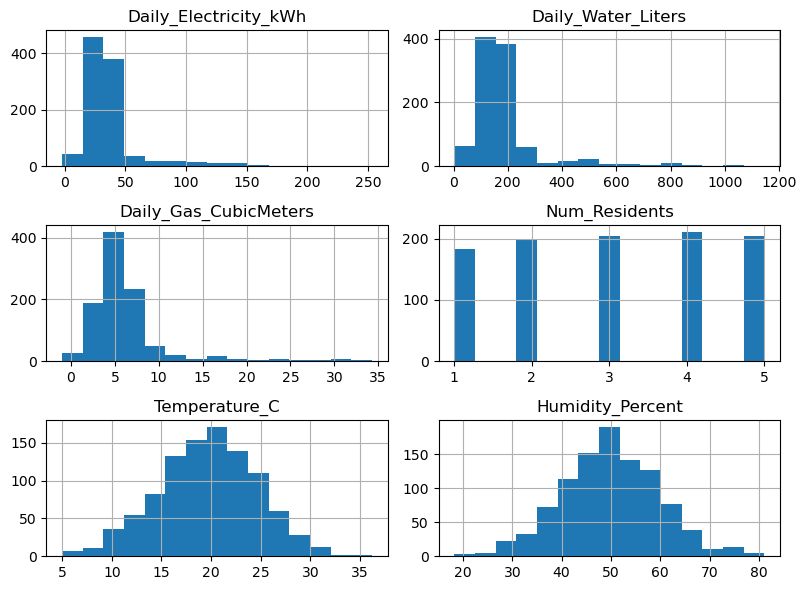

In [20]:
df.hist(figsize=(8, 6), bins=15)  # Adjust bins if needed
plt.tight_layout()
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Plot the density plot of each feature   
</div>

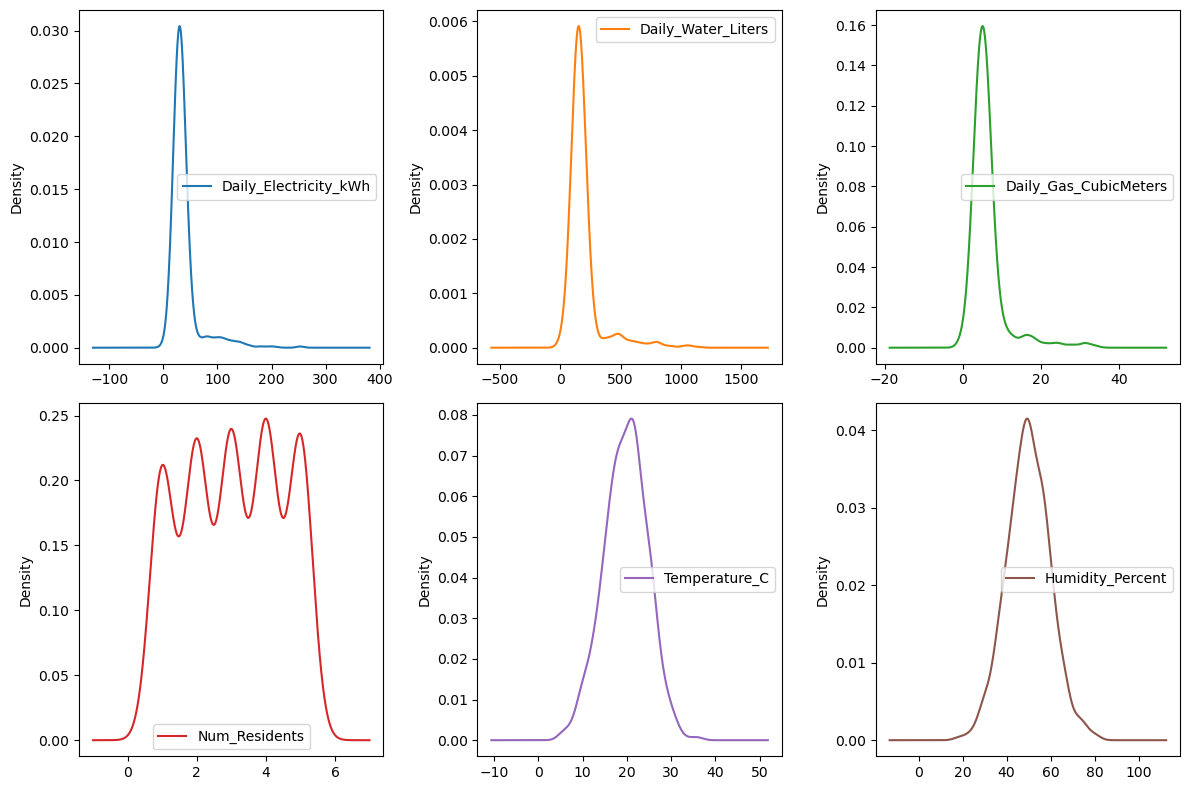

In [22]:
df.plot(kind='kde', subplots=True, layout=(2, 3), figsize=(12, 8), sharex=False)
plt.tight_layout()  
plt.show()

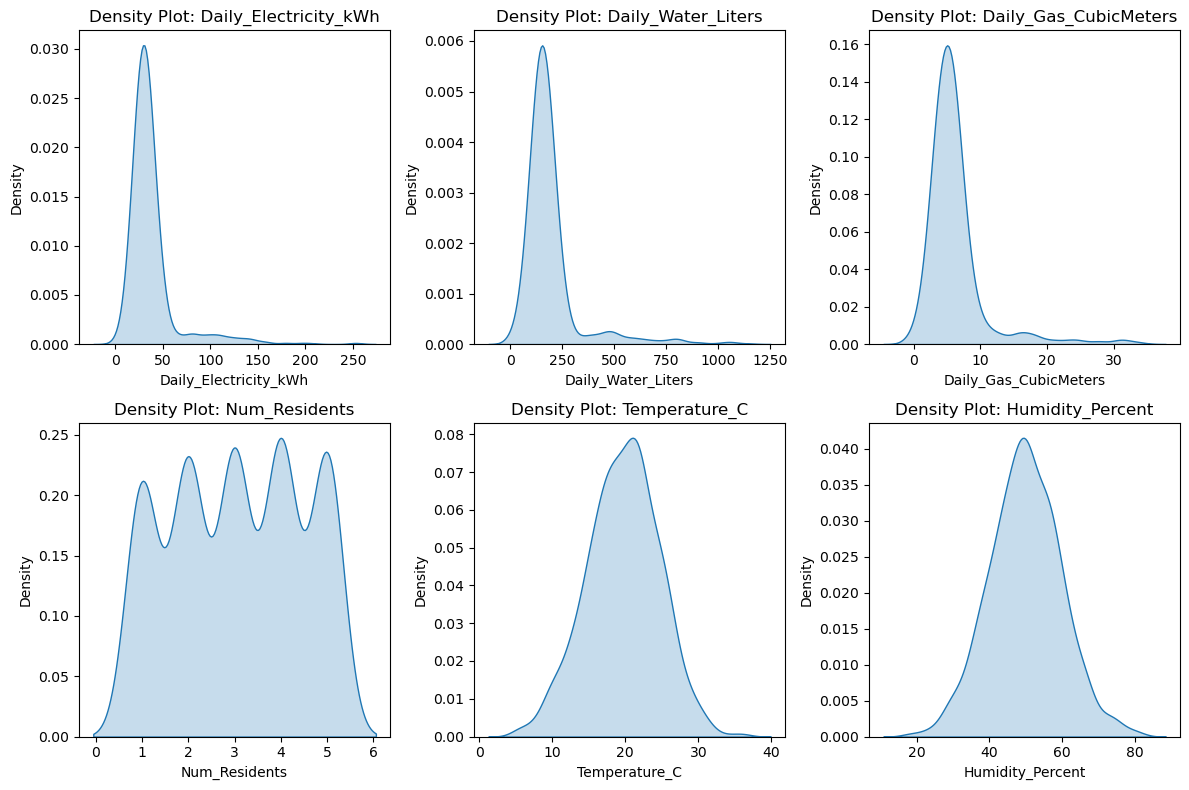

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

for ax, col in zip(axes, numeric_cols):
    sns.kdeplot(data=df, x=col, ax=ax, shade=True)
    ax.set_title(f'Density Plot: {col}')

plt.tight_layout()
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Boxplot of each feature. Should we delete the outliers?
</div>

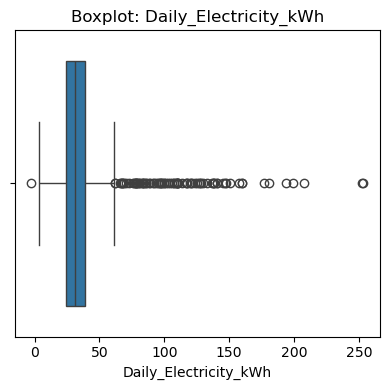

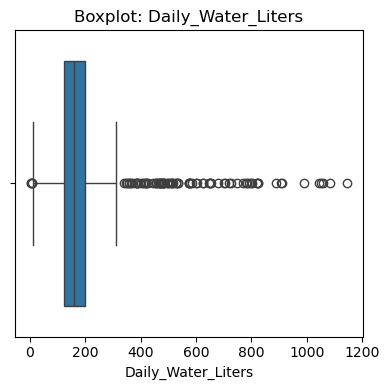

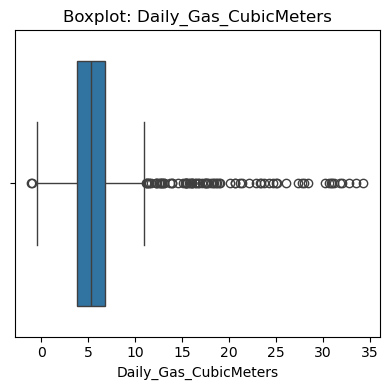

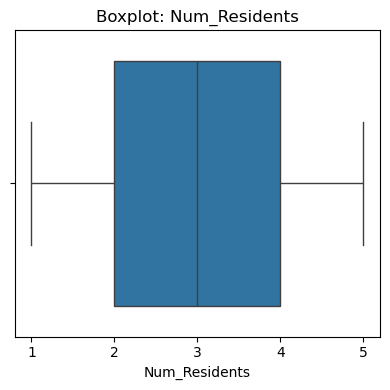

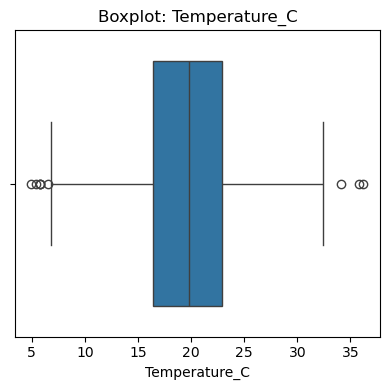

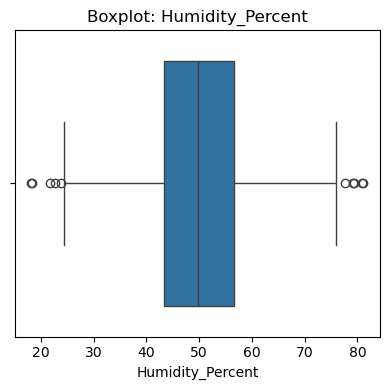

In [25]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

In [26]:
df.corr()

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Daily_Electricity_kWh,1.000000,0.653551,0.592534,0.087706,-0.014029,-0.028081
Daily_Water_Liters,0.653551,1.000000,0.651797,0.072882,0.011441,-0.004636
Daily_Gas_CubicMeters,0.592534,0.651797,1.000000,0.087867,-0.013337,0.007942
Num_Residents,0.087706,0.072882,0.087867,1.000000,0.013595,0.025451
Temperature_C,-0.014029,0.011441,-0.013337,0.013595,1.000000,-0.008983
Humidity_Percent,-0.028081,-0.004636,0.007942,0.025451,-0.008983,1.000000


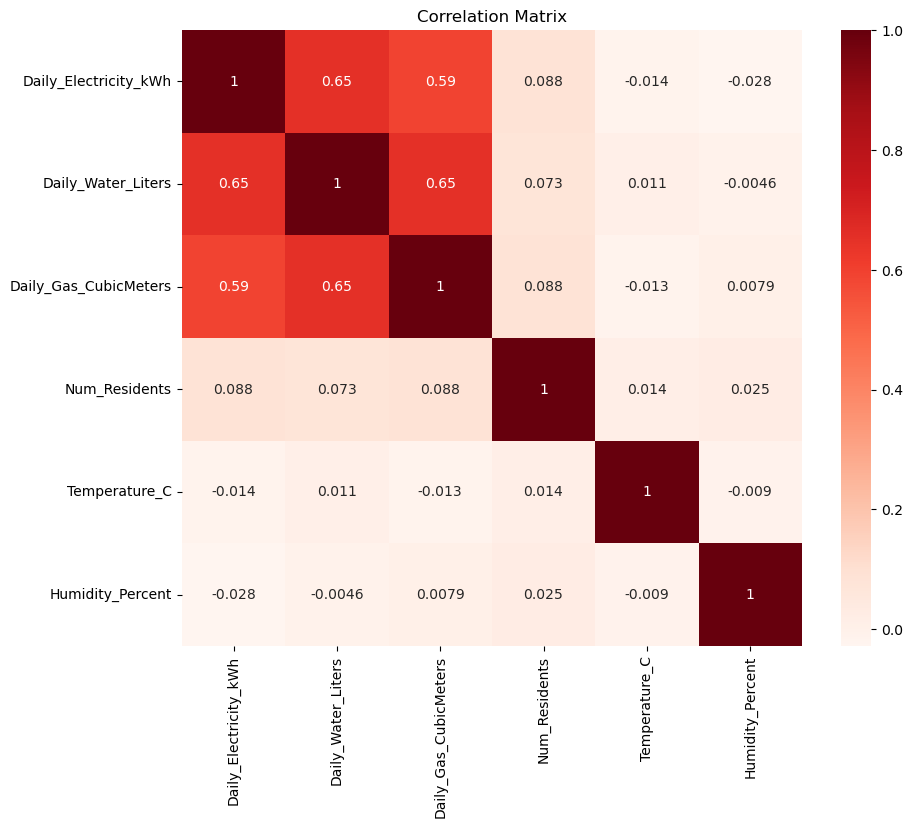

In [27]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

In [28]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Step 1: Scale the data
scaler = StandardScaler()

df_scaled = df.copy()  # Make a copy if you want to keep your original df
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,-0.089829,0.195493,-0.547629,0.676040,-0.061421,-2.031887
2,-0.322350,0.030359,-0.319680,-0.754732,0.528538,-2.859305
3,-0.034545,-0.270536,-0.597991,-1.470118,-0.440025,0.842619
4,0.285993,-0.516318,-0.389888,-0.754732,-0.121110,0.146802
5,-0.357463,-0.048399,-1.071019,1.391426,-0.940190,-0.212876
...,...,...,...,...,...,...
996,-0.374654,0.080977,-0.224318,-1.470118,0.913999,0.319227
997,0.386569,-0.300504,-0.146881,0.676040,-0.624963,-0.778313
998,2.561576,1.461248,1.315248,-0.039346,-2.892353,0.734039


In [29]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,-0.154487,1.196258
1,-0.408463,2.652996
2,-0.685260,0.241418
3,-0.445012,0.342670
4,-0.678197,-0.633988
...,...,...
995,-0.463932,0.548731
996,0.045948,0.260960
997,3.063193,-0.121520
998,-0.726767,-0.879490


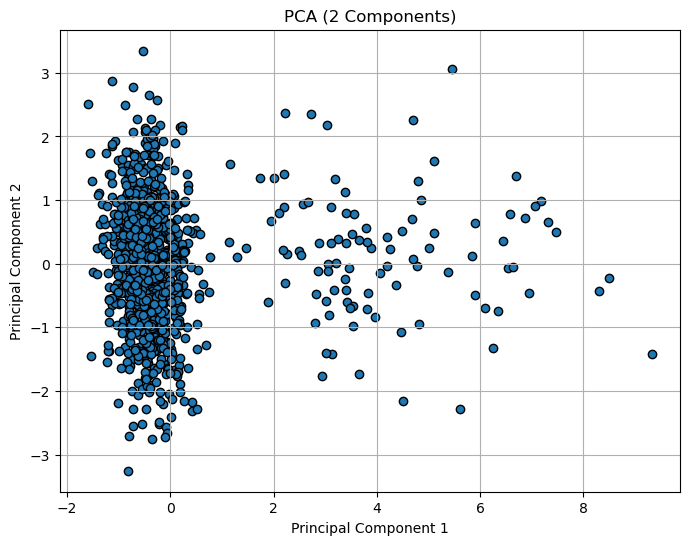

In [30]:
# Visualize the principal components in a plot

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 Components)')
plt.grid(True)
plt.show()

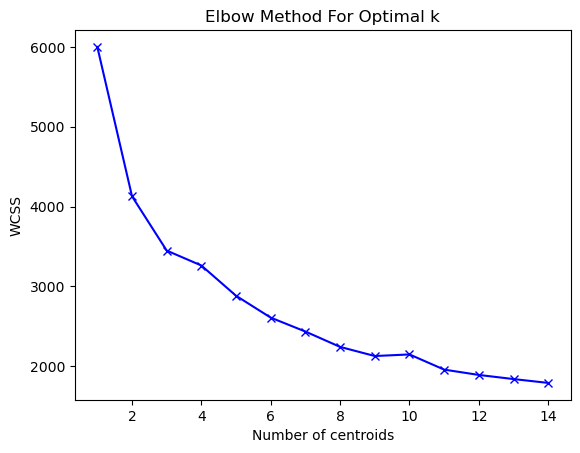

In [31]:
# Elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

In [32]:
# Train the K-means for the optimal number of clusters given the result of the Elbow method.
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
y_kmeans

array([1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 2, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       2, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 2, 0, 1, 0, 2, 0, 0, 0, 1, 1, 1, 1, 0, 2, 1, 1, 2, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       2, 1, 1, 1, 1, 0, 1, 2, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 2, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 2, 1, 1, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 2, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0, 1, 0, 0, 1,
       2, 1, 1, 0, 1, 0, 1, 1, 2, 2, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 2, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0,
       1, 1, 0, 2, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,

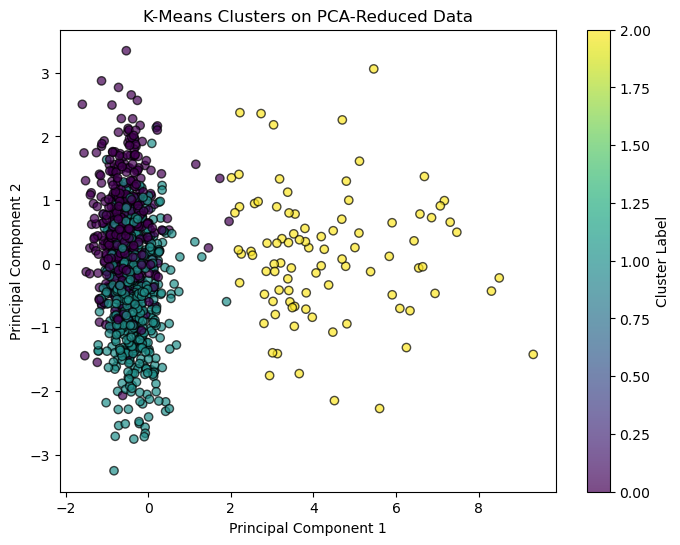

In [33]:
# Visualize K-Means Clustering on PCA Components (each data point should be color according to the cluster labels)
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=y_kmeans,                  # Color by cluster label
    cmap='viridis',             # A nice color map
    alpha=0.7,                  # Slight transparency
    edgecolors='k'              # Black edges for clarity
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.colorbar(label='Cluster Label')  # Optional colorbar
plt.show()

In [34]:
# Add cluster labels to the original dataset (create a new column)
df["cluster"] = y_kmeans

# Verify that the new column is added:
df.head()

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent,cluster
Household_ID,,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612,1
2,28.617357,196.231684,4.710963,2,22.289028,21.676741,0
3,36.476885,152.981518,3.415160,1,17.515340,58.139809,0
4,45.230299,117.653161,4.384077,2,19.087155,51.286175,0
5,27.658466,184.911166,1.212771,5,15.050211,47.743436,1


In [35]:
df_cluster_means = df.groupby("cluster").mean()
df_cluster_means

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
cluster,,,,,,
0,30.264153,151.869686,5.058419,1.781609,20.392772,49.020199
1,30.558514,158.305156,5.094623,4.156448,19.081810,50.656037
2,106.534373,553.546504,17.273962,3.413043,19.429429,49.523054


In [36]:
df_cluster_means_01 = df_cluster_means.loc[[0, 1]]
df_cluster_means_01

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
cluster,,,,,,
0,30.264153,151.869686,5.058419,1.781609,20.392772,49.020199
1,30.558514,158.305156,5.094623,4.156448,19.081810,50.656037


<Figure size 1000x500 with 0 Axes>

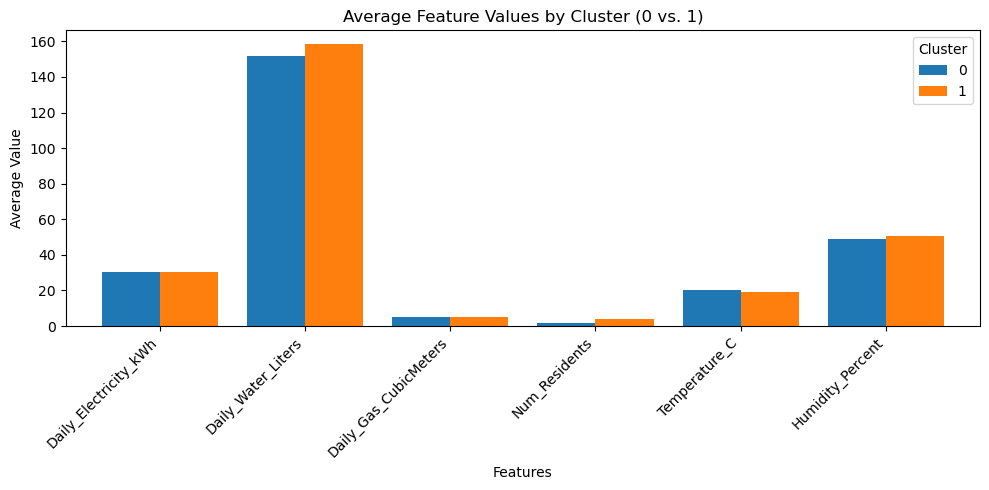

In [37]:
# Identify potential anomalous households based on extreme feature averages

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Transpose so that features become rows, and clusters become columns.
df_cluster_means_01_t = df_cluster_means_01.T

# Create a grouped bar chart
df_cluster_means_01_t.plot(kind='bar', figsize=(10, 5), width=0.8)

plt.title("Average Feature Values by Cluster (0 vs. 1)")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for readability
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()


In [38]:
df

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent,cluster
Household_ID,,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612,1
2,28.617357,196.231684,4.710963,2,22.289028,21.676741,0
3,36.476885,152.981518,3.415160,1,17.515340,58.139809,0
4,45.230299,117.653161,4.384077,2,19.087155,51.286175,0
5,27.658466,184.911166,1.212771,5,15.050211,47.743436,1
...,...,...,...,...,...,...,...
996,27.188997,203.507512,5.154961,1,24.188821,52.984518,0
997,47.976865,148.673937,5.515505,4,16.603847,42.174014,1
998,107.373052,401.905625,12.323095,3,5.428720,57.070324,2


***Removing Outliers***

In [39]:

df=pd.read_excel(r"Labsubmission_suspicious_consumption_dataset.xlsx")
df = df.set_index('Household_ID')

df

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612
2,28.617357,196.231684,4.710963,2,22.289028,21.676741
3,36.476885,152.981518,3.415160,1,17.515340,58.139809
4,45.230299,117.653161,4.384077,2,19.087155,51.286175
5,27.658466,184.911166,1.212771,5,15.050211,47.743436
...,...,...,...,...,...,...
996,27.188997,203.507512,5.154961,1,24.188821,52.984518
997,47.976865,148.673937,5.515505,4,16.603847,42.174014
998,107.373052,401.905625,12.323095,3,5.428720,57.070324


In [40]:
import pandas as pd

# Assuming the dataset is in a DataFrame named 'df'

# Define a function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile
    Q3 = df[column].quantile(0.75)  # Third quartile
    IQR = Q3 - Q1                   # Interquartile range
    lower_bound = Q1 - 1.5 * IQR    # Lower bound
    upper_bound = Q3 + 1.5 * IQR    # Upper bound
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to clean
columns_to_clean = [
    'Daily_Electricity_kWh',
    'Daily_Water_Liters',
    'Daily_Gas_CubicMeters'
]

# Apply the outlier removal for each column
for column in columns_to_clean:
    df = remove_outliers(df, column)

# The cleaned DataFrame is now free of outliers
df

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612
2,28.617357,196.231684,4.710963,2,22.289028,21.676741
3,36.476885,152.981518,3.415160,1,17.515340,58.139809
4,45.230299,117.653161,4.384077,2,19.087155,51.286175
5,27.658466,184.911166,1.212771,5,15.050211,47.743436
...,...,...,...,...,...,...
995,19.983800,167.572410,3.096163,4,21.931913,51.514030
996,27.188997,203.507512,5.154961,1,24.188821,52.984518
997,47.976865,148.673937,5.515505,4,16.603847,42.174014


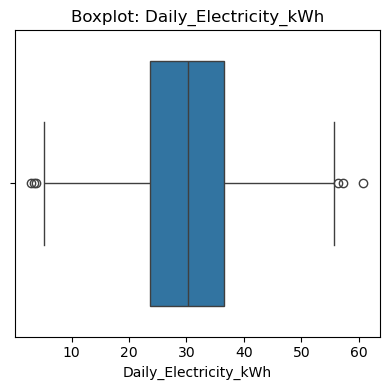

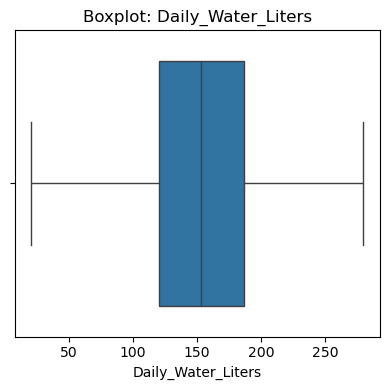

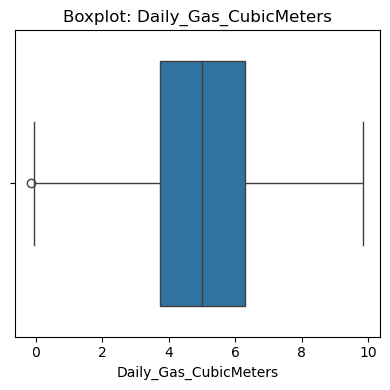

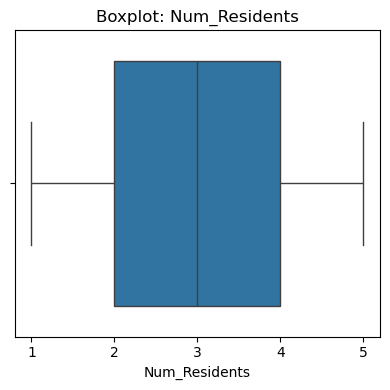

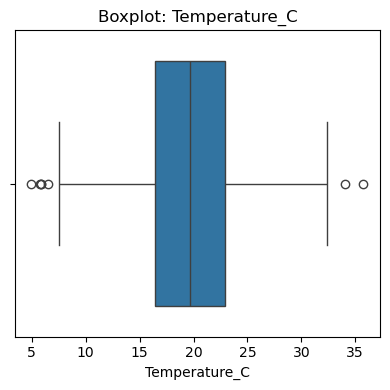

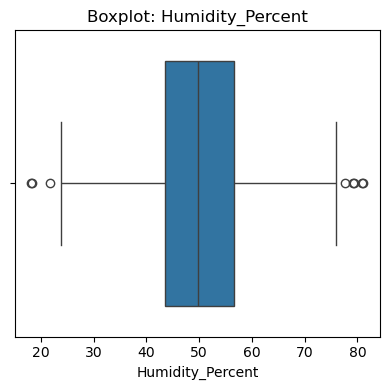

In [41]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    plt.figure(figsize=(4, 4))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot: {col}")
    plt.tight_layout()
    plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Multivariate plot: Scatter plot 
</div>

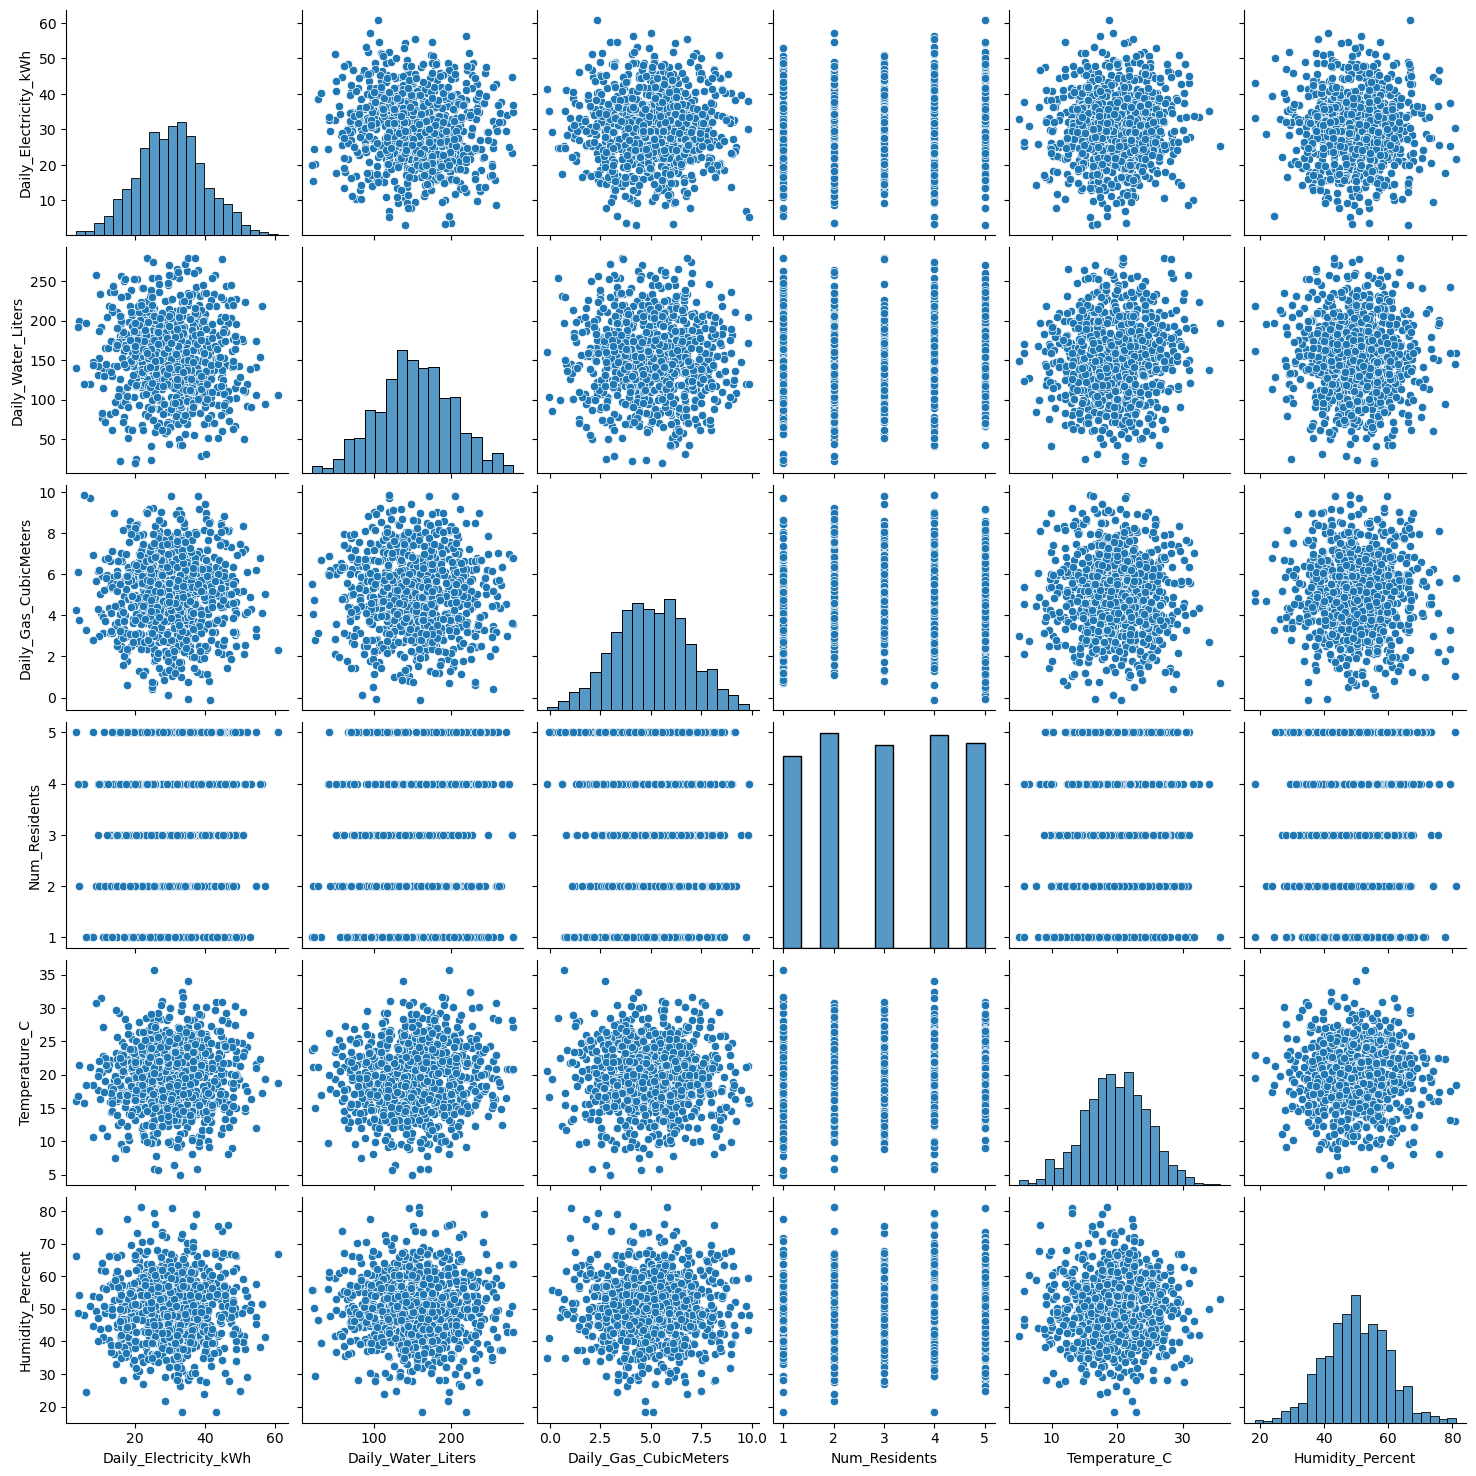

In [43]:
numeric_cols = [
    'Daily_Electricity_kWh',
    'Daily_Water_Liters',
    'Daily_Gas_CubicMeters',
    'Num_Residents',
    'Temperature_C',
    'Humidity_Percent'
]

# Create a pairplot
sns.pairplot(df[numeric_cols])
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Multivariate plot: Correlation matrix.
</div>

In [45]:
df.corr()

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Daily_Electricity_kWh,1.000000,-0.053657,0.017193,0.036739,0.036390,-0.022516
Daily_Water_Liters,-0.053657,1.000000,-0.020611,0.064221,0.054191,-0.028042
Daily_Gas_CubicMeters,0.017193,-0.020611,1.000000,0.019276,-0.011215,-0.028002
Num_Residents,0.036739,0.064221,0.019276,1.000000,0.010668,0.029396
Temperature_C,0.036390,0.054191,-0.011215,0.010668,1.000000,-0.011394
Humidity_Percent,-0.022516,-0.028042,-0.028002,0.029396,-0.011394,1.000000


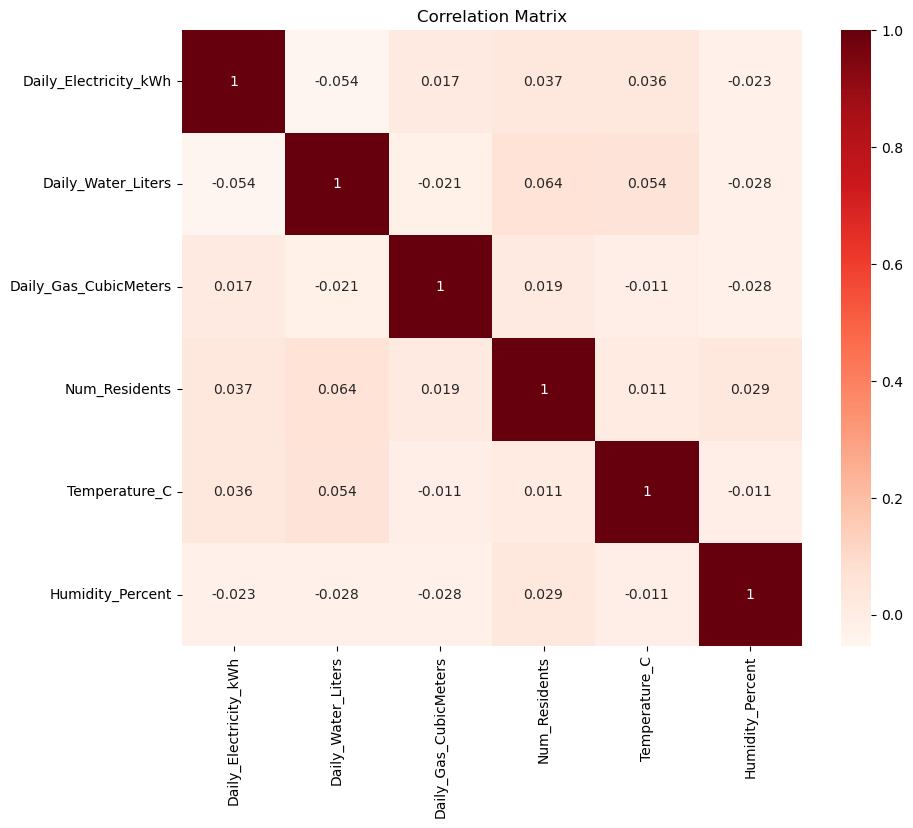

In [46]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='Reds')
plt.title("Correlation Matrix")
plt.show()

# 3. **Prepare the data.**

* Take care of missing data (if necessary)
* Scale the data


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Take care of missing data (if necessary)
</div>

In [49]:
df.isna().sum()

Daily_Electricity_kWh    0
Daily_Water_Liters       0
Daily_Gas_CubicMeters    0
Num_Residents            0
Temperature_C            0
Humidity_Percent         0
dtype: int64

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Scale the data using StandardScaler()
</div>

In [51]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns


# Step 1: Scale the data
scaler = StandardScaler()

df_scaled = df.copy()  # Make a copy if you want to keep your original df
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
Household_ID,,,,,,
1,0.490928,1.368938,-0.735422,0.698296,-0.069655,-2.042420
2,-0.165129,0.878369,-0.163566,-0.730813,0.527630,-2.866706
3,0.646915,-0.015508,-0.861765,-1.445367,-0.452960,0.821204
4,1.551314,-0.745661,-0.339697,-0.730813,-0.130085,0.128021
5,-0.264202,0.644401,-2.048447,1.412850,-0.959336,-0.230295
...,...,...,...,...,...,...
995,-1.057145,0.286051,-1.033646,0.698296,0.454273,0.151066
996,-0.312707,1.028743,0.075667,-1.445367,0.917877,0.299793
997,1.835089,-0.104536,0.269934,0.698296,-0.640195,-0.793592


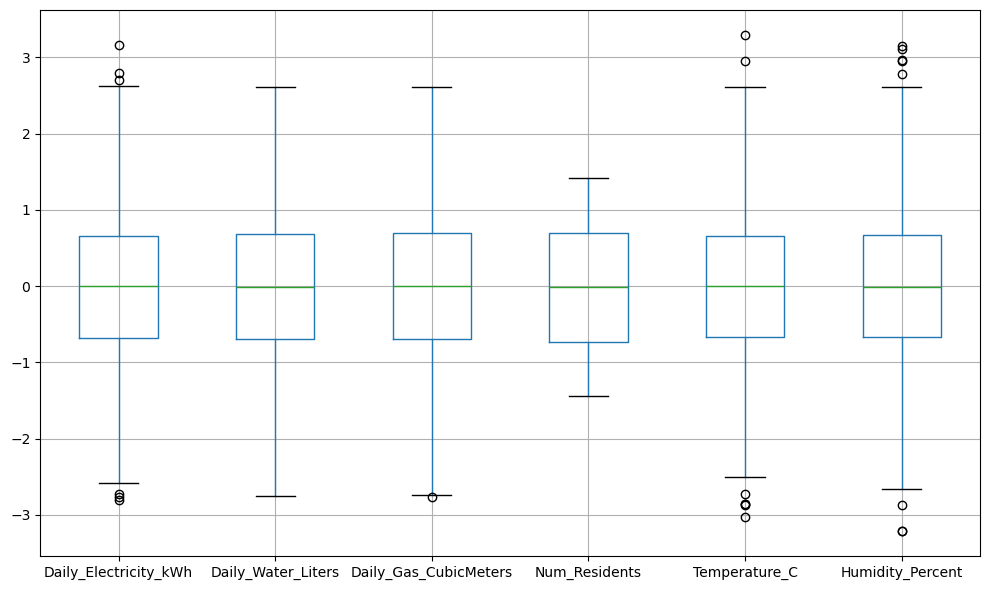

In [52]:
df_scaled.boxplot(figsize=(10, 6))
plt.tight_layout()
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Dimensionality reduction with PCA: Reduce the scaled dataset to 2 principal components and plot them on a 2D graph.
</div>

In [54]:
from sklearn.decomposition import PCA

# PCA for dimensionality reduction
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Create a new DataFrame with the principal components
pca_df = pd.DataFrame(data=df_pca, columns=['PC1', 'PC2'])
pca_df

,PC1,PC2
0,1.510563,0.409590
1,0.771070,0.420981
2,-0.960119,-0.561935
3,-0.945023,0.959322
4,0.887375,-1.166474
...,...,...
874,0.860232,-1.141222
875,0.416933,-0.652594
876,-0.007343,1.743738
877,-0.811781,-1.031728


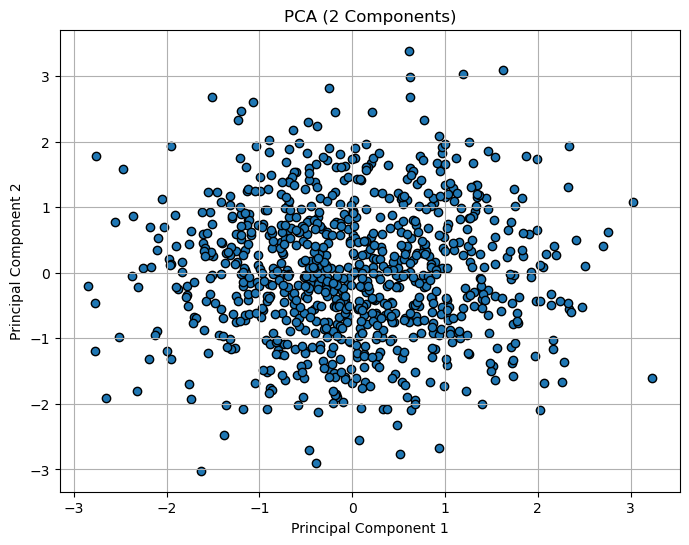

In [55]:
# Visualize the principal components in a plot

plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], cmap='viridis', edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA (2 Components)')
plt.grid(True)
plt.show()

# 4. Unsupervised Learning Model Building: Houses Clustering using K-means

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Find the optimal number of clusters using the Elbow method
</div>

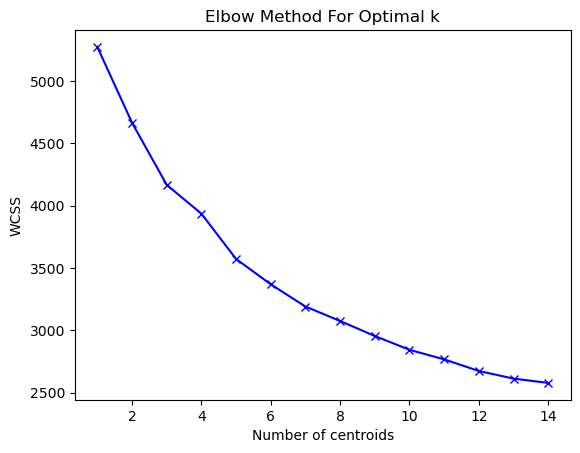

In [58]:
# Elbow method
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
wcss = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_scaled)
    wcss.append(km.inertia_)
plt.plot(K, wcss, 'bx-')
plt.xlabel('Number of centroids')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Use K-means to find the cluster for each household
</div>

In [60]:
# Train the K-means for the optimal number of clusters given the result of the Elbow method.
kmeans = KMeans(n_clusters=5, random_state=0).fit(df_scaled)
y_kmeans = kmeans.predict(df_scaled)
y_kmeans

array([1, 1, 3, 2, 0, 0, 4, 0, 1, 3, 1, 0, 3, 0, 1, 0, 0, 0, 1, 1, 3, 3,
       2, 1, 4, 2, 1, 0, 1, 2, 3, 2, 2, 1, 0, 0, 3, 0, 4, 1, 1, 1, 2, 3,
       1, 3, 1, 1, 3, 3, 3, 1, 4, 4, 4, 1, 1, 2, 2, 0, 3, 2, 3, 3, 4, 2,
       2, 1, 2, 2, 2, 4, 4, 2, 3, 4, 0, 0, 3, 1, 4, 3, 0, 1, 0, 2, 3, 0,
       1, 4, 1, 4, 3, 2, 4, 2, 1, 1, 4, 0, 3, 3, 3, 4, 0, 1, 3, 4, 1, 3,
       0, 3, 2, 1, 2, 2, 1, 4, 0, 1, 0, 4, 1, 2, 0, 2, 1, 0, 3, 2, 2, 0,
       0, 3, 0, 2, 4, 0, 2, 3, 1, 2, 2, 4, 2, 2, 2, 1, 3, 3, 1, 0, 4, 4,
       1, 0, 2, 0, 2, 2, 2, 0, 1, 2, 4, 0, 3, 0, 0, 0, 2, 2, 1, 2, 4, 1,
       3, 3, 1, 4, 2, 0, 0, 3, 4, 3, 2, 2, 4, 4, 4, 0, 4, 2, 4, 2, 1, 4,
       1, 2, 4, 1, 0, 4, 0, 2, 0, 4, 2, 1, 3, 1, 3, 2, 4, 0, 2, 2, 0, 0,
       2, 2, 2, 3, 1, 2, 4, 3, 3, 4, 3, 1, 1, 4, 0, 1, 1, 4, 1, 2, 0, 3,
       0, 1, 0, 3, 1, 3, 4, 4, 2, 0, 2, 4, 3, 2, 4, 3, 1, 0, 3, 3, 4, 4,
       0, 2, 1, 3, 3, 3, 4, 4, 1, 1, 2, 4, 4, 3, 2, 2, 1, 2, 0, 4, 4, 1,
       3, 1, 2, 2, 3, 2, 2, 4, 4, 0, 1, 4, 1, 1, 1,

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Visualize the K-Means Clustering results obtained before on the PCA Components plot. 
</div>

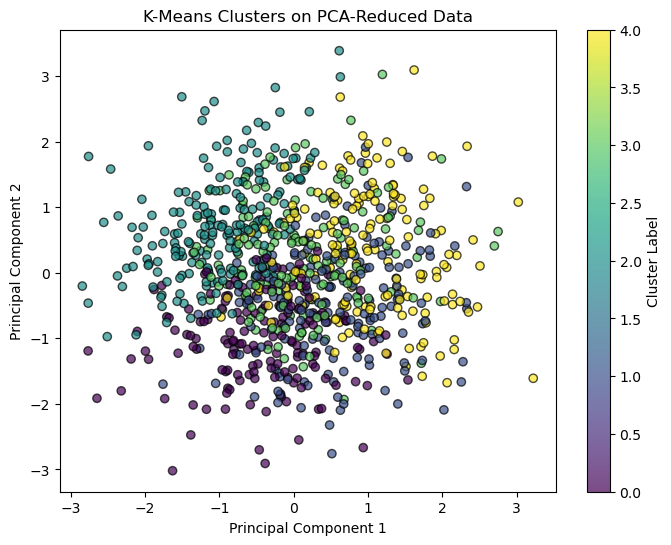

In [62]:
# Visualize K-Means Clustering on PCA Components (each data point should be color according to the cluster labels)
plt.figure(figsize=(8, 6))
plt.scatter(
    pca_df['PC1'], 
    pca_df['PC2'], 
    c=y_kmeans,                  # Color by cluster label
    cmap='viridis',             # A nice color map
    alpha=0.7,                  # Slight transparency
    edgecolors='k'              # Black edges for clarity
)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clusters on PCA-Reduced Data')
plt.colorbar(label='Cluster Label')  # Optional colorbar
plt.show()

<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
    Add cluster labels back to the original dataset (create a new column named "cluster" in the original dataset)
</div>

In [64]:
# Add cluster labels to the original dataset (create a new column)
df["cluster"] = y_kmeans

# Verify that the new column is added:
df.head()

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent,cluster
Household_ID,,,,,,,
1,34.967142,219.967772,3.649643,4,19.381337,29.826612,1
2,28.617357,196.231684,4.710963,2,22.289028,21.676741,1
3,36.476885,152.981518,3.415160,1,17.515340,58.139809,3
4,45.230299,117.653161,4.384077,2,19.087155,51.286175,2
5,27.658466,184.911166,1.212771,5,15.050211,47.743436,0


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Group the data by cluster label (.groupby('cluster')) and compute the mean values (.mean()). and store that into a DataFrame that displays the mean values of each feature for clusters labeled as 0 and 1.
</div>




In [66]:
df_cluster_means = df.groupby("cluster").mean()
df_cluster_means

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
cluster,,,,,,
0,25.494393,138.893910,3.338456,2.881988,17.859879,57.233543
1,22.188667,176.686792,4.863549,3.241379,19.710330,41.095078
2,34.455032,109.815250,6.009181,2.852941,16.854287,47.162675
3,35.552482,166.902213,4.712608,1.722892,23.553437,50.510615
4,32.549097,183.430047,5.838255,4.373563,21.155609,55.154305


In [67]:
df_cluster_means_01 = df_cluster_means.loc[[0, 1]]
df_cluster_means_01

,Daily_Electricity_kWh,Daily_Water_Liters,Daily_Gas_CubicMeters,Num_Residents,Temperature_C,Humidity_Percent
cluster,,,,,,
0,25.494393,138.893910,3.338456,2.881988,17.859879,57.233543
1,22.188667,176.686792,4.863549,3.241379,19.710330,41.095078


<div style="background-color: #f0f0f0; padding: 25px; border-radius: 5px; margin-top: 25px;">
Create a plot to visualize the average feature values for clusters 0 and 1 using bar plots and identify which features are most meaningful for detecting suspicious consumption. 
</div>




<Figure size 1000x500 with 0 Axes>

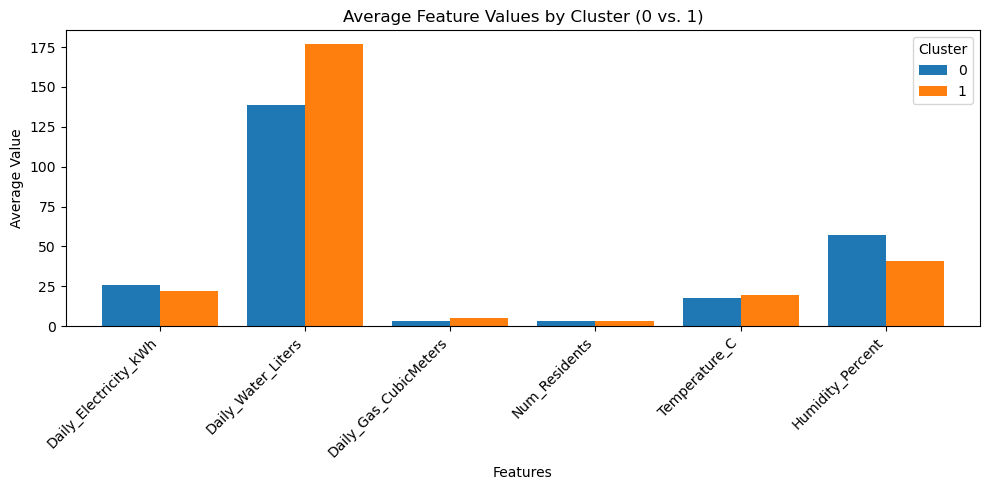

In [69]:
# Identify potential anomalous households based on extreme feature averages

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

# Transpose so that features become rows, and clusters become columns.
df_cluster_means_01_t = df_cluster_means_01.T

# Create a grouped bar chart
df_cluster_means_01_t.plot(kind='bar', figsize=(10, 5), width=0.8)

plt.title("Average Feature Values by Cluster (0 vs. 1)")
plt.xlabel("Features")
plt.ylabel("Average Value")
plt.xticks(rotation=45, ha='right')  # Rotate feature labels for readability
plt.legend(title="Cluster", loc="best")
plt.tight_layout()
plt.show()


Observations

Num_Residents stands out as the most significant difference. Cluster 1 has more than twice as many residents on average (about 4 vs. about 1–2 in cluster 0).

Daily_Water_Liters is also higher by roughly 6.4 liters for Cluster 1, which makes sense given the larger household size.

Electricity and gas usage remain quite similar between the two clusters, indicating that larger households in this dataset do not drastically change electricity/gas consumption—at least not in proportion to the increase in residents. However, water consumption does show a noticeable uptick.

Temperature and Humidity differences (slightly cooler and more humid for cluster 1) might be environmental or seasonal factors rather than “suspicious” consumption.

Interpreting Suspicious Consumption
If you are using these clusters to detect anomalous or “suspicious” consumption patterns:

Cluster 1 doesn’t show extreme jumps in electricity or gas usage, but it does have more occupants and marginally higher water usage. This could be normal for larger households.
Cluster 0 has fewer residents, slightly lower water usage, and marginally higher average temperature.
Overall, neither cluster seems dramatically more “suspicious,” but household size (Num_Residents) is the clearest differentiator. If the goal is to find genuinely abnormal usage patterns, you might look for households that deviate from these typical usage patterns for their cluster—for example, a household in Cluster 1 (large family) that uses far less water or far more electricity than the cluster average.

# Final conclusion

Summarize the outcomes of the code developed, including a brief overview of the clustering process and the results obtained. Highlight any key findings or patterns observed after clustering the households, such as distinctive characteristics that might lead to suspicious consumption


Conclusion

Data was successfully clustered into two main groups (0 and 1).

Cluster 1 had a higher average number of residents and marginally higher water usage, which likely reflects normal behavior for larger households.
No extreme outliers or grossly suspicious group-level patterns emerged, but the framework allows you to zoom in on individual households whose consumption is atypical for their assigned cluster.




